In [1]:
import matplotlib.pyplot as plt
import numpy as np

For now I'm importing from the build directory instead of using `pip install -e .`

In [2]:
import sys
sys.path.append('/Users/henryiii/git/fitting/goofit/build-py3')

First, we need to import GooFit. For scripts, this can be written `from goofit import *`, but the following form is clearer for examples.

In [3]:
import goofit

We start by defining our independent variable:

In [4]:
x = goofit.Variable('x', -10, 10)

Make data in Numpy from a random distribution. We could explicitly limit this to the correct range, but instead, we'll pass `filter=True` when we convert the array to a GooFit DataSet:

In [5]:
data = np.random.normal(1,2.5,100000)

When we make the dataset, we'll need a 2D dataset ($1\times n$ in this case). We could simply add a dimension, but passing an list of arrays works as well:

In [6]:
dataset = goofit.UnbinnedDataSet(x)
dataset.from_numpy([data], filter=True)

GooFit classes are expected to act like Python objects, so we can check the length, for example:

In [7]:
len(dataset)

99979

Now, we set up two more Variables (fit parameters in this case), floating with an initial value and a range.

In [8]:
mean = goofit.Variable('mean', 0, -10, 10)
sigma = goofit.Variable('sigma', 1, 0, 5)

Now, we make a new Gaussian PDF, with a name, a variable, and two parameters:

In [9]:
gauss = goofit.GaussianPdf('gauss', x, mean, sigma)

Now, fit our dataset with our PDF:

In [10]:
gauss.fitTo(dataset)

We can check our parameters to verify they have changed to match the values we used to make the data:

In [11]:
print(mean)
print(sigma)

mean: 0.98959 +/- 0.00559655 [-10, 10] GooFit index: 0 Fitter index: 0
sigma: 2.50259 +/- 0.00395736 [0, 5] GooFit index: 1 Fitter index: 1


### Plotting
First, we make a grid dataset (grid) and evaluate the pdf over the grid (pts).

In [12]:
grid, pts = gauss.generate(x)

Then, plot the histogram (normalized) and the PDF points.

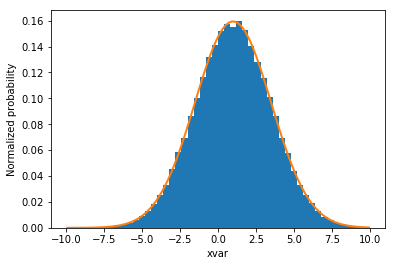

In [14]:
plt.figure(figsize=(6, 4))
plt.hist(dataset.to_numpy().T, bins=50, range=(-10,10), normed=True)
plt.plot(grid.to_numpy().flatten(), pts, linewidth=2)
plt.xlabel('xvar')
plt.ylabel('Normalized probability')
plt.show()